In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 1 Задача (Поиск мина и макса с редукцией и без) (среднее время по 10 попыткам)

### Редукция (reduction) в OpenMP — это механизм, используемый для выполнения операций над частными копиями переменной в разных потоках и их объединения в одну итоговую переменную. 

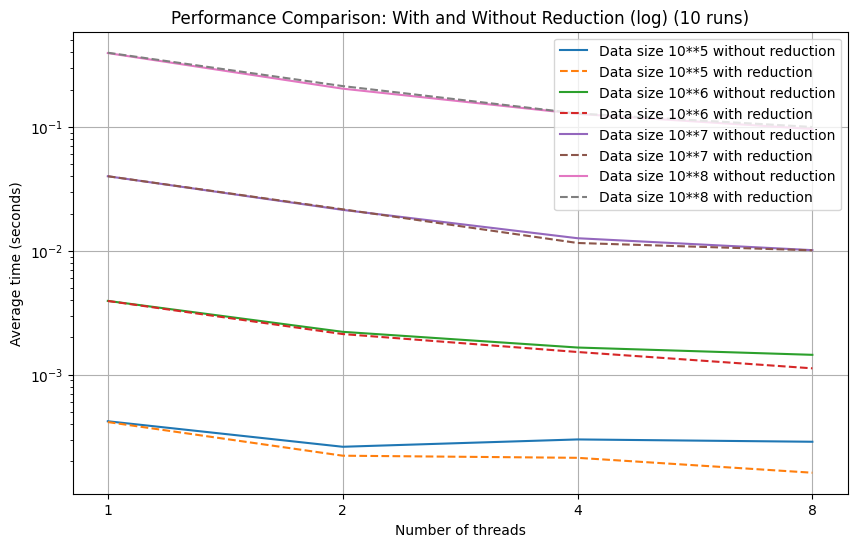

In [38]:
# Данные
data_sizes = ['10**5', '10**6', '10**7', '10**8']
num_threads = ['1', '2', '4', '8']

# Среднее время без редукции (в секундах)
time_without_reduction = [
    [0.00042153, 0.00026237, 0.00030066, 0.00028798],
    [0.00394673, 0.00222174, 0.0016594, 0.00144887],
    [0.0400537, 0.0214324, 0.0126531, 0.0101398],
    [0.395021, 0.203907, 0.127563, 0.0962842]
]

# Среднее время с редукцией (в секундах)
time_with_reduction = [
    [0.00041526, 0.00022223, 0.00021365, 0.00016196],
    [0.0039432, 0.00213197, 0.00152703, 0.00112701],
    [0.0400453, 0.0216592, 0.0115824, 0.0101011],
    [0.397665, 0.213928, 0.128656, 0.0999985]
]

fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time_without_reduction[i], label=f'Data size {size} without reduction')
    ax.plot(num_threads, time_with_reduction[i], label=f'Data size {size} with reduction', linestyle='--')

ax.set_yscale('log')  # Логарифмическая шкала для оси Y (по времени)
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison: With and Without Reduction (log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


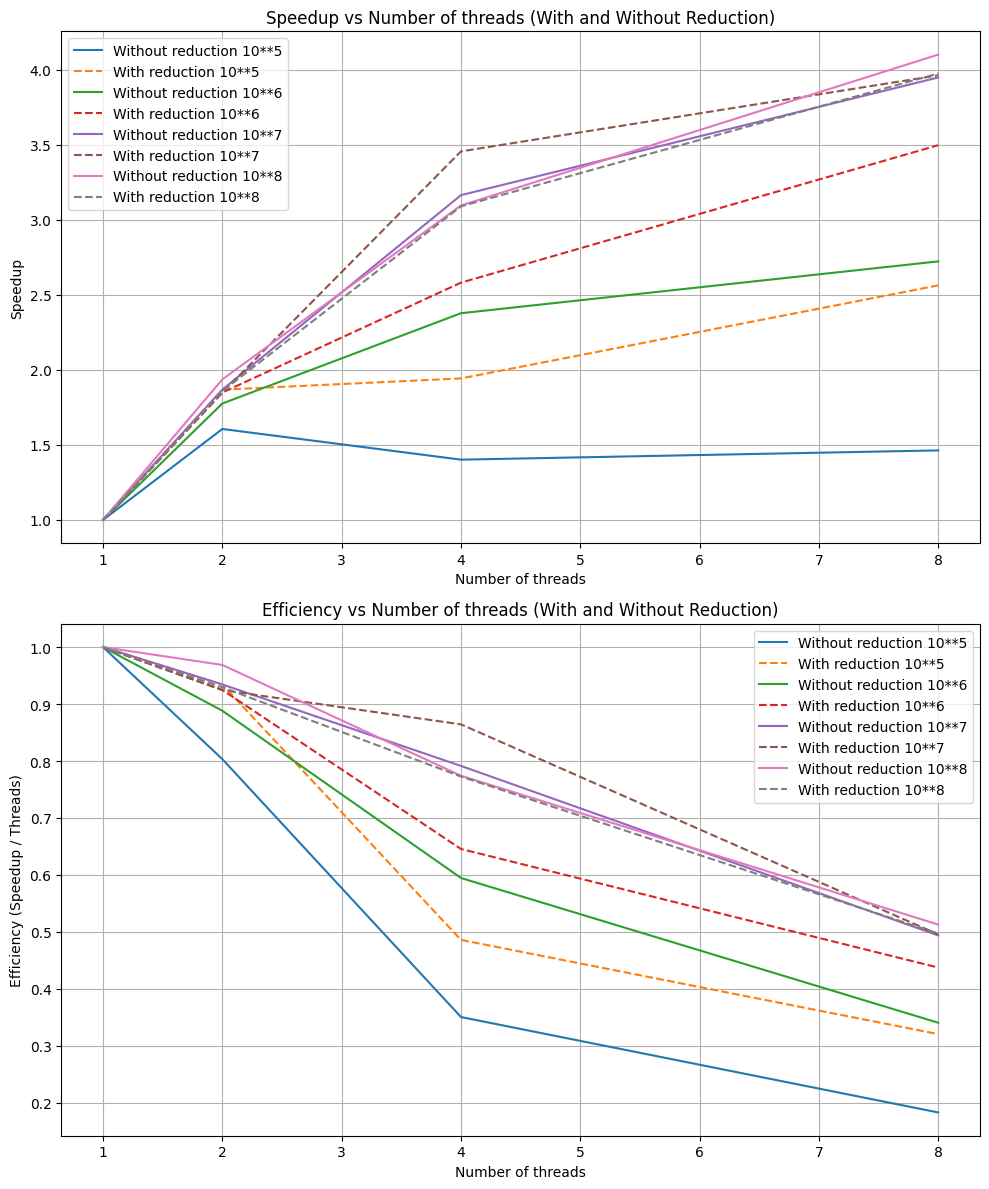

In [39]:
# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
speedup_without_reduction = []
speedup_with_reduction = []
num_threads = list(map(int, num_threads))
# Польза каждого ядра
efficiency_without_reduction = []
efficiency_with_reduction = []

for i in range(len(data_sizes)):
    # Скорость с 1 потоком (первая запись из каждой строки) для без редукции
    base_time_without = time_without_reduction[i][0]
    # Скорость с 1 потоком (первая запись из каждой строки) для с редукцией
    base_time_with = time_with_reduction[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup_without_reduction.append([base_time_without / t for t in time_without_reduction[i]])
    speedup_with_reduction.append([base_time_with / t for t in time_with_reduction[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency_without_reduction.append([s / nt for s, nt in zip(speedup_without_reduction[i], num_threads)])
    efficiency_with_reduction.append([s / nt for s, nt in zip(speedup_with_reduction[i], num_threads)])

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup_without_reduction[i], label=f'Without reduction {size}')
    ax[0].plot(num_threads, speedup_with_reduction[i], label=f'With reduction {size}', linestyle='--')

ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads (With and Without Reduction)')
ax[0].legend()
ax[0].grid(True)

# График эффективности (пользы ядра)
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency_without_reduction[i], label=f'Without reduction {size}')
    ax[1].plot(num_threads, efficiency_with_reduction[i], label=f'With reduction {size}', linestyle='--')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads (With and Without Reduction)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


# 2 Задача (Поиск cкалярного произведения) (среднее время по 10 попыткам)

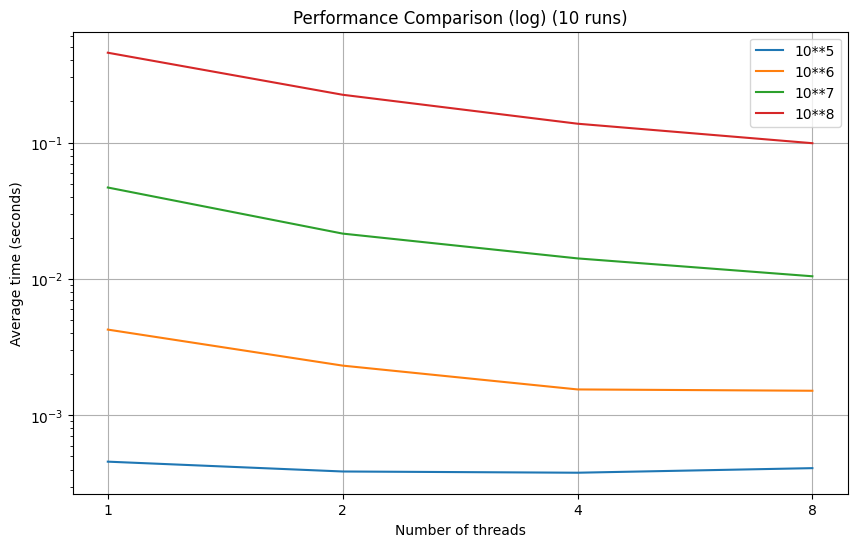

In [40]:
# Данные
data_sizes = ['10**5', '10**6', '10**7', '10**8']
num_threads = ['1', '2', '4', '8']

time = [
    [0.00045675, 0.0003869, 0.00037892, 0.00040937],  # Data size: 100000
    [0.00424668, 0.00231172, 0.00154626, 0.00151228],  # Data size: 1000000
    [0.0467687, 0.0214785, 0.0141308, 0.0104489],      # Data size: 10000000
    [0.455378, 0.223903, 0.137353, 0.0988216]          # Data size: 100000000
]

fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time[i], label=f'{size}')
    
ax.set_yscale('log')  # Логарифмическая шкала для оси Y (по времени)
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison (log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


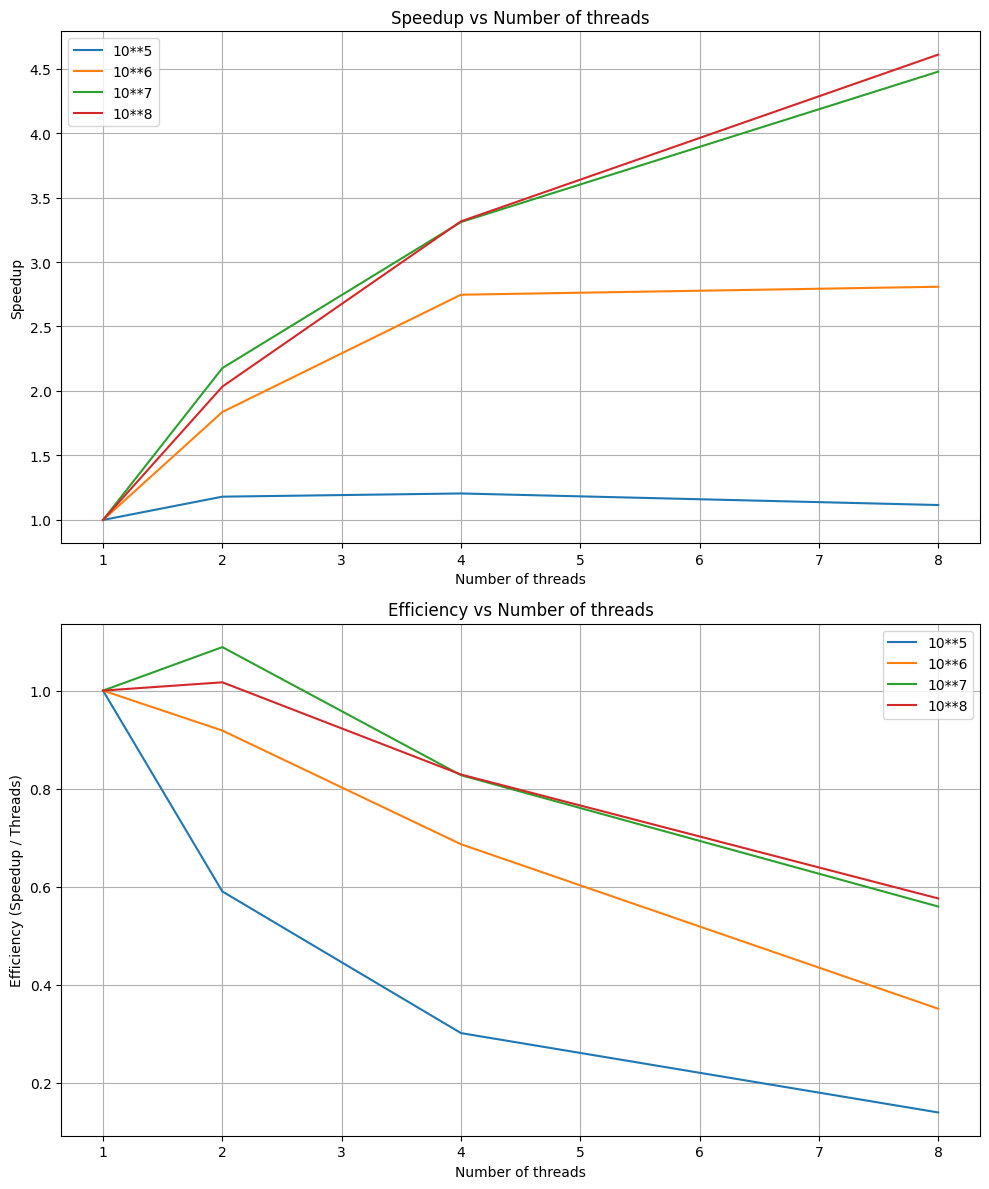

In [41]:
num_threads = list(map(int, num_threads))  # Преобразуем в список чисел

# Рассчитываем ускорение (Speedup) от числа потоков
speedup = []
efficiency = []  # Для хранения эффективности

for i in range(len(data_sizes)):
    base_time = time[i][0]
    speedup.append([base_time / t for t in time[i]])

    # Считаем эффективность (Speedup / num_threads) для каждого набора данных
    efficiency.append([s / nt for s, nt in zip(speedup[i], num_threads)])

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup[i], label=f'{size}')

ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads')
ax[0].legend()
ax[0].grid(True)

# График эффективности (пользы ядра)
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency[i], label=f'{size}')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

# 3 Задача (Поиск определенного интеграла методом прямоугольников) (среднее время по 10 попыткам)

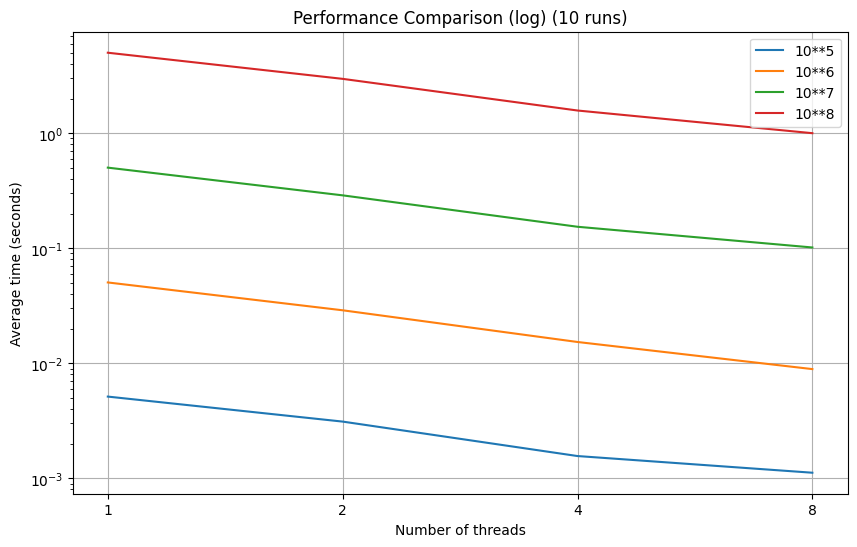

In [42]:
# Данные
data_sizes = ['10**5', '10**6', '10**7', '10**8']
num_threads = ['1', '2', '4', '8']

time = [
    [0.00513051, 0.0031104, 0.00156107, 0.00111802],  # Data size: 100000
    [0.0503788, 0.02886, 0.0153018, 0.00889455],       # Data size: 1000000
    [0.501391, 0.287955, 0.153577, 0.10144],           # Data size: 10000000
    [5.00037, 2.96376, 1.57284, 0.999036]              # Data size: 100000000
]
fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time[i], label=f'{size}')
    
ax.set_yscale('log')  # Логарифмическая шкала для оси Y (по времени)
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison (log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


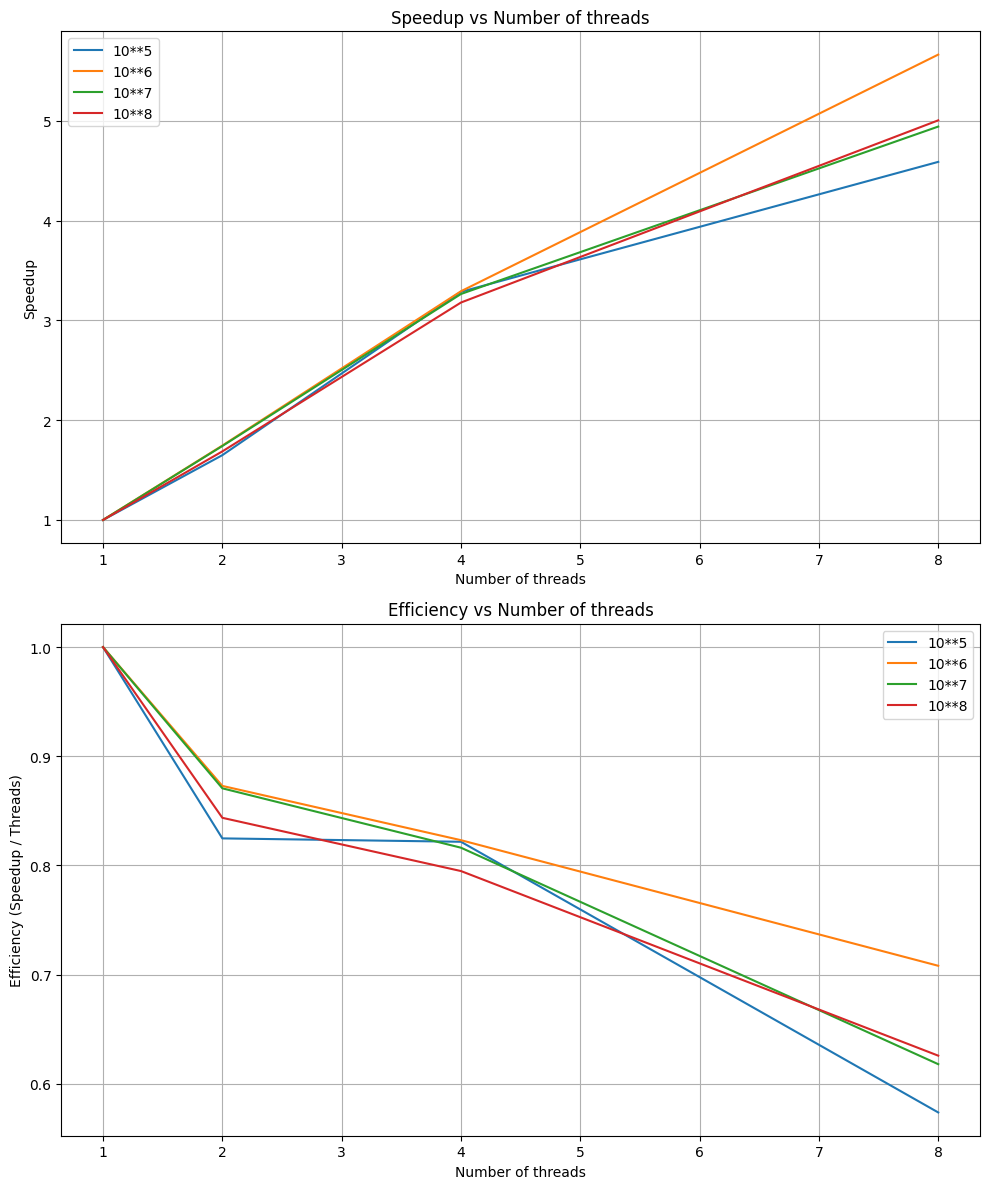

In [43]:
# Преобразуем num_threads в числовой формат
num_threads = ['1', '2', '4', '8']
num_threads = list(map(int, num_threads))

# Рассчитываем ускорение (Speedup) и эффективность (Efficiency)
speedup = []
efficiency = []

for i in range(len(data_sizes)):
    base_time = time[i][0]  # Время с одним потоком
    speedup.append([base_time / t for t in time[i]])  # Рассчитываем ускорение для каждого числа потоков
    efficiency.append([s / nt for s, nt in zip(speedup[i], num_threads)])  # Рассчитываем эффективность

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup[i], label=f'{size}')

ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads')
ax[0].legend()
ax[0].grid(True)

# График эффективности
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency[i], label=f'{size}')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()



# 4 Задача (МинМакс) (среднее время по 10 попыткам)

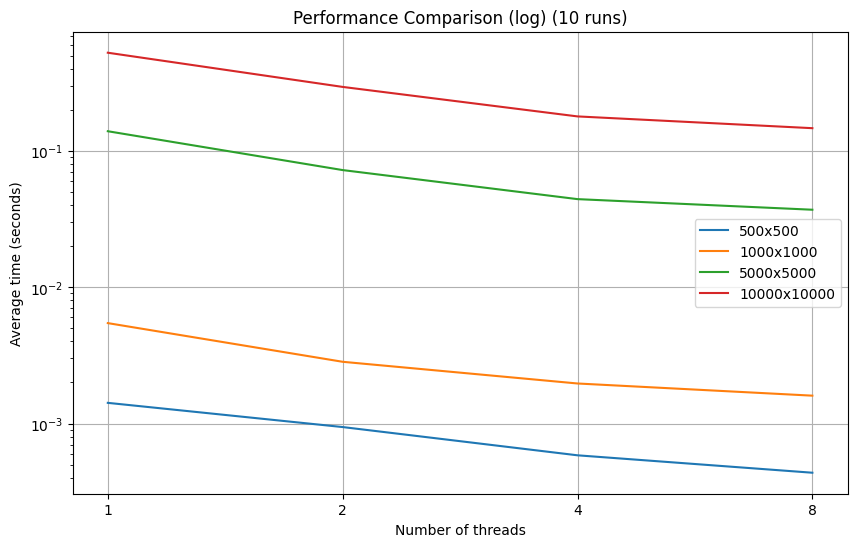

In [44]:
# Данные
data_sizes = ['500x500', '1000x1000', '5000x5000', '10000x10000']
num_threads = ['1', '2', '4', '8']

time = [
    [0.00141732, 0.00094177, 0.00058438, 0.00043544],  # Matrix size: 500x500
    [0.00545008, 0.00283601, 0.00196568, 0.00160042], # Matrix size: 1000x1000
    [0.139319, 0.0722856, 0.0442525, 0.0369991],        # Matrix size: 5000x5000
    [0.524737, 0.294519, 0.178947, 0.146685]            # Matrix size: 10000x10000
]

fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time[i], label=f'{size}')
    
ax.set_yscale('log')  # Логарифмическая шкала для оси Y (по времени)
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison (log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


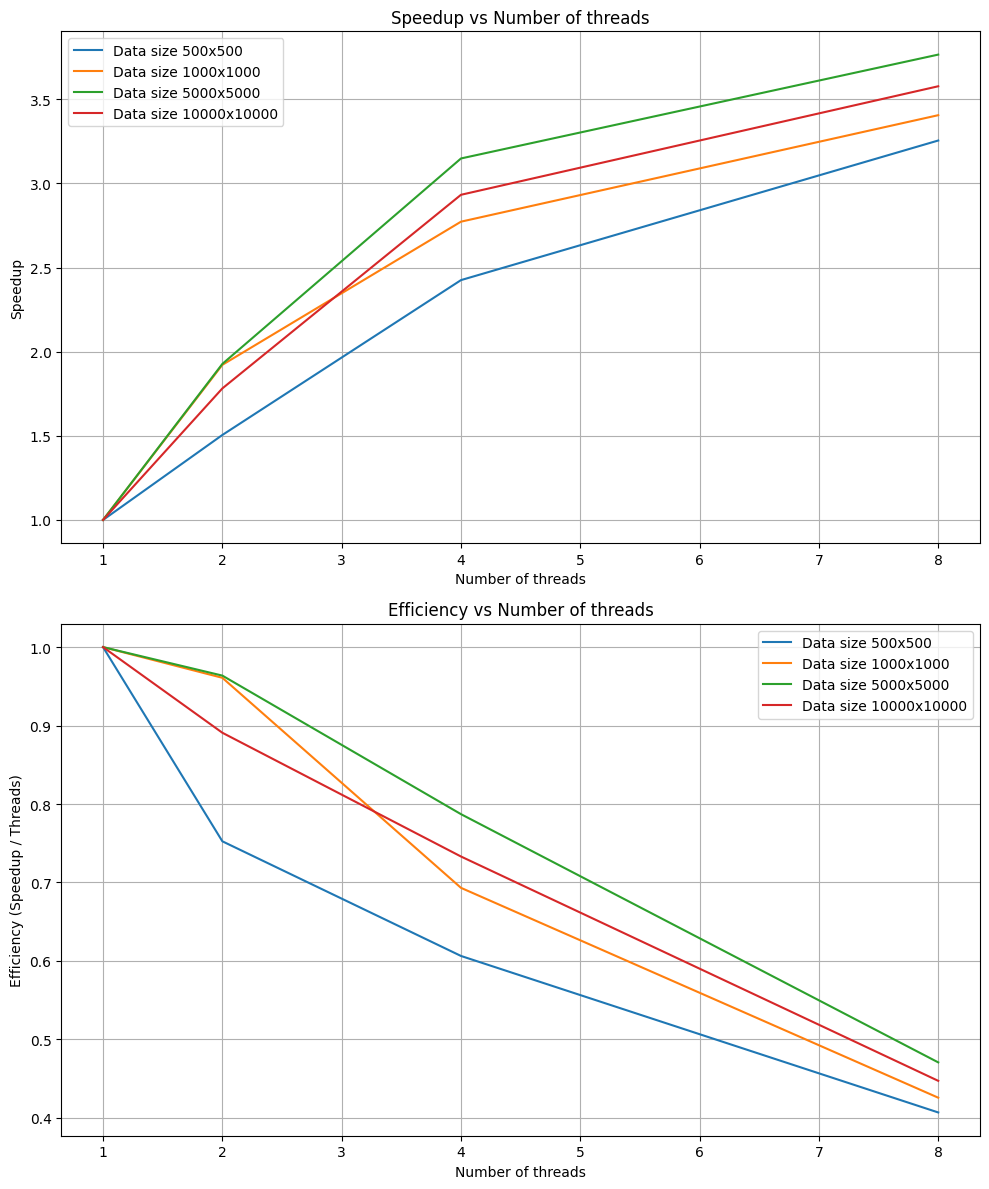

In [45]:
# Преобразуем num_threads в числовой формат
num_threads = ['1', '2', '4', '8']
num_threads = list(map(int, num_threads))

# Рассчитываем ускорение (Speedup) и эффективность (Efficiency)
speedup = []
efficiency = []

for i in range(len(data_sizes)):
    base_time = time[i][0]  # Время с одним потоком
    speedup.append([base_time / t for t in time[i]])  # Рассчитываем ускорение для каждого числа потоков
    efficiency.append([s / nt for s, nt in zip(speedup[i], num_threads)])  # Рассчитываем эффективность

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup[i], label=f'Data size {size}')

ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads')
ax[0].legend()
ax[0].grid(True)

# График эффективности
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency[i], label=f'Data size {size}')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()



# 5 Задача (МинМакс по треугольной матрице с разными правилами распределения итераций) (среднее время по 10 попыткам)

### При статическом распределении итерации цикла делятся на блоки фиксированного размера и назначаются потокам заранее (на этапе компиляции). Потоки получают равное количество работы, если это возможно.
### При динамическом распределении итерации делятся на блоки (указанного размера) и назначаются потокам "на лету" по мере их освобождения. Это позволяет более эффективно справляться с неравномерным временем выполнения итераций.
### При адаптивном распределении размер блока постепенно уменьшается по мере завершения итераций. Это позволяет эффективно справляться с циклами, где в начале итерации требуют больше времени, а в конце — меньше.

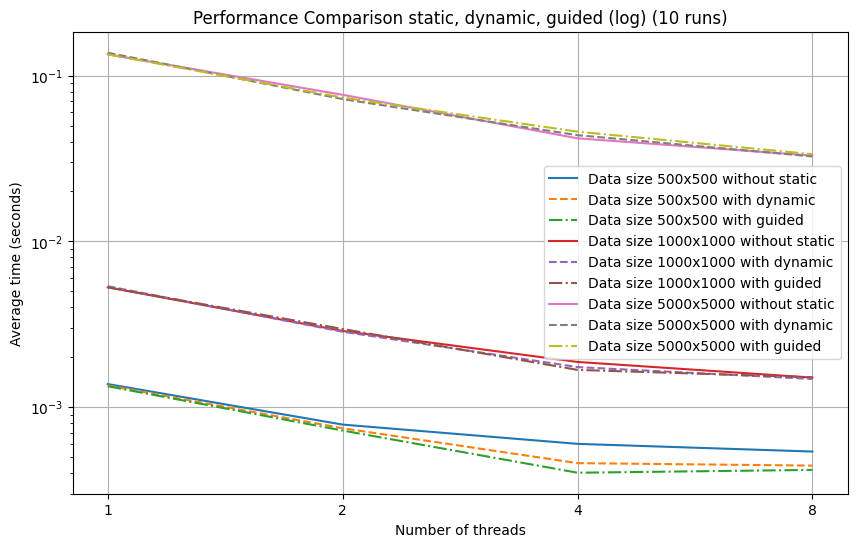

In [46]:
# Данные
data_sizes = ['500x500', '1000x1000', '5000x5000']
num_threads = ['1', '2', '4', '8']

time_static = [
    [0.00137626, 0.00078389, 0.00059978, 0.00053898],
    [0.00528224, 0.00287872, 0.00187252, 0.00150553],
    [0.13441, 0.076666, 0.0418795, 0.0329422]      
]

time_dynamic = [
    [0.00135013, 0.00074492, 0.00045886, 0.00044326],
    [0.00536155, 0.00284865, 0.00174306, 0.00147811],
    [0.137581, 0.0722143, 0.0437387, 0.0325442]       
]

time_guided = [
    [0.00133551, 0.00072169, 0.00040158, 0.00041757],
    [0.00527861, 0.0029595, 0.00167633, 0.00151377],
    [0.13439, 0.0737552, 0.0459346, 0.0335817]      
]



fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time_static[i], label=f'Data size {size} without static')
    ax.plot(num_threads, time_dynamic[i], label=f'Data size {size} with dynamic', linestyle='--')
    ax.plot(num_threads, time_guided[i], label=f'Data size {size} with guided', linestyle='-.')
    
ax.set_yscale('log')  # Логарифмическая шкала для оси Y (по времени)
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison static, dynamic, guided (log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


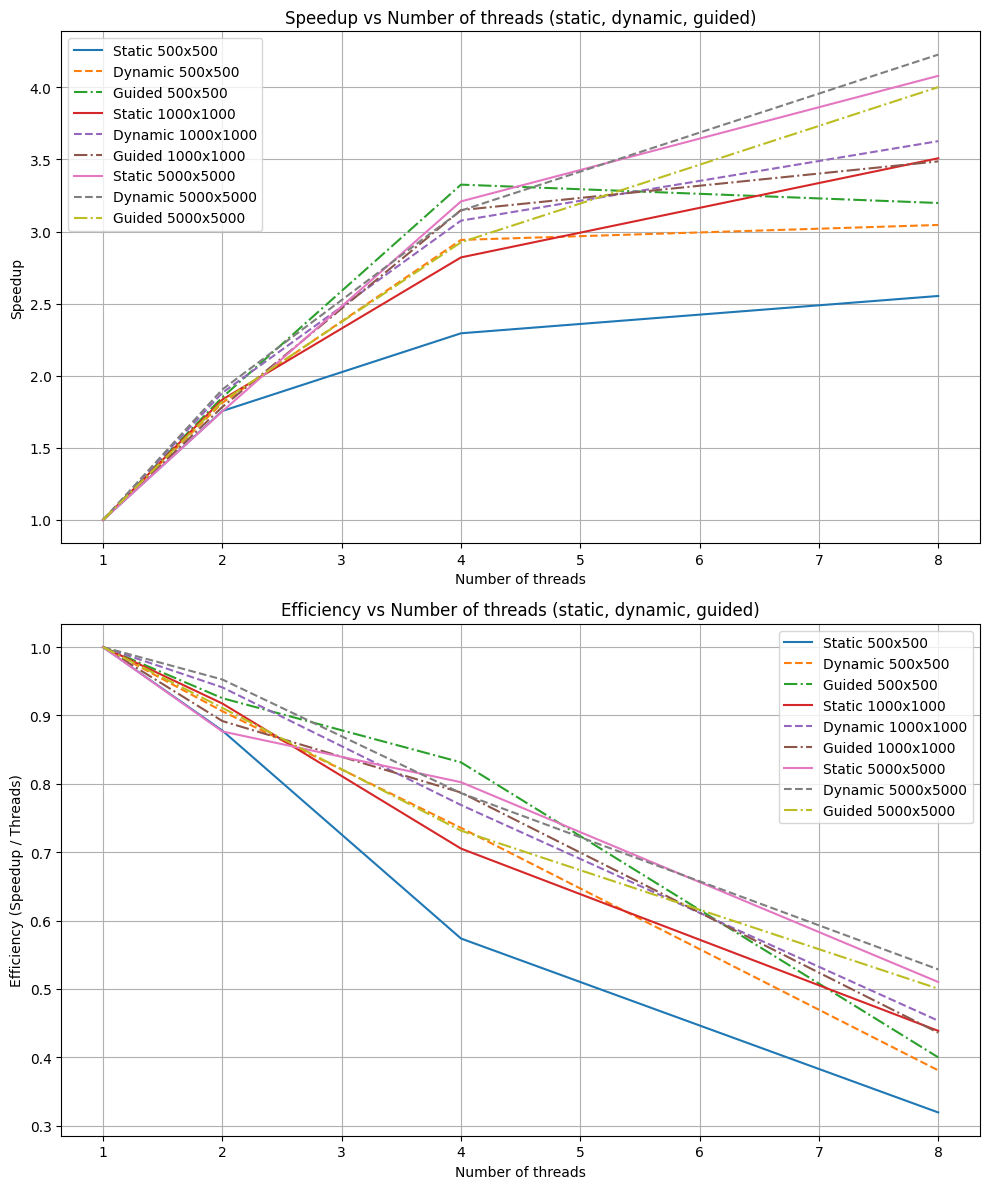

In [47]:
# Преобразуем num_threads в числовой формат
num_threads = ['1', '2', '4', '8']
num_threads = list(map(int, num_threads))

# Рассчитываем ускорение (Speedup) и эффективность (Efficiency) для static, dynamic, guided
speedup_static = []
speedup_dynamic = []
speedup_guided = []
efficiency_static = []
efficiency_dynamic = []
efficiency_guided = []

for i in range(len(data_sizes)):
    base_static = time_static[i][0]
    base_dynamic = time_dynamic[i][0]
    base_guided = time_guided[i][0]
    
    # Рассчитываем ускорение для каждого подхода
    speedup_static.append([base_static / t for t in time_static[i]])
    speedup_dynamic.append([base_dynamic / t for t in time_dynamic[i]])
    speedup_guided.append([base_guided / t for t in time_guided[i]])
    
    # Рассчитываем эффективность для каждого подхода
    efficiency_static.append([s / nt for s, nt in zip(speedup_static[i], num_threads)])
    efficiency_dynamic.append([s / nt for s, nt in zip(speedup_dynamic[i], num_threads)])
    efficiency_guided.append([s / nt for s, nt in zip(speedup_guided[i], num_threads)])

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup_static[i], label=f'Static {size}')
    ax[0].plot(num_threads, speedup_dynamic[i], label=f'Dynamic {size}', linestyle='--')
    ax[0].plot(num_threads, speedup_guided[i], label=f'Guided {size}', linestyle='-.')

ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads (static, dynamic, guided)')
ax[0].legend()
ax[0].grid(True)

# График эффективности
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency_static[i], label=f'Static {size}')
    ax[1].plot(num_threads, efficiency_dynamic[i], label=f'Dynamic {size}', linestyle='--')
    ax[1].plot(num_threads, efficiency_guided[i], label=f'Guided {size}', linestyle='-.')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads (static, dynamic, guided)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


# 6 Задача (исследование правил распределения итераций) (среднее время по 10 попыткам)

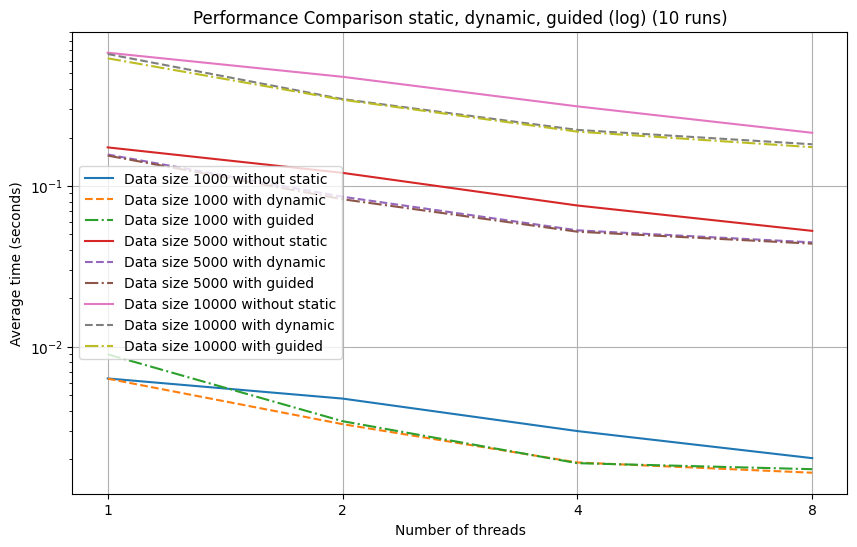

In [48]:
# Данные
data_sizes = ['1000', '5000', '10000']
num_threads = ['1', '2', '4', '8']

time_static = [
    [0.00635975, 0.00476875, 0.00299521, 0.00203288],
    [0.173627, 0.12059, 0.0755873, 0.0525713],
    [0.673025, 0.476859, 0.312311, 0.21394]      
]

time_dynamic = [
    [0.0063405, 0.00330733, 0.00191065, 0.00165031],
    [0.156769, 0.0856767, 0.0529786, 0.0446026],
    [0.660593, 0.346627, 0.222946, 0.181526]       
]

time_guided = [
    [0.00898507, 0.00345048, 0.00189158, 0.00173636],
    [0.15442, 0.0826869, 0.0519472, 0.0437858],
    [0.621385, 0.343275, 0.2175, 0.174166]      
]


fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time_static[i], label=f'Data size {size} without static')
    ax.plot(num_threads, time_dynamic[i], label=f'Data size {size} with dynamic', linestyle='--')
    ax.plot(num_threads, time_guided[i], label=f'Data size {size} with guided', linestyle='-.')
    
ax.set_yscale('log')  # Логарифмическая шкала для оси Y (по времени)
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison static, dynamic, guided (log) (10 runs)')
ax.legend()
plt.grid(True)
plt.show()


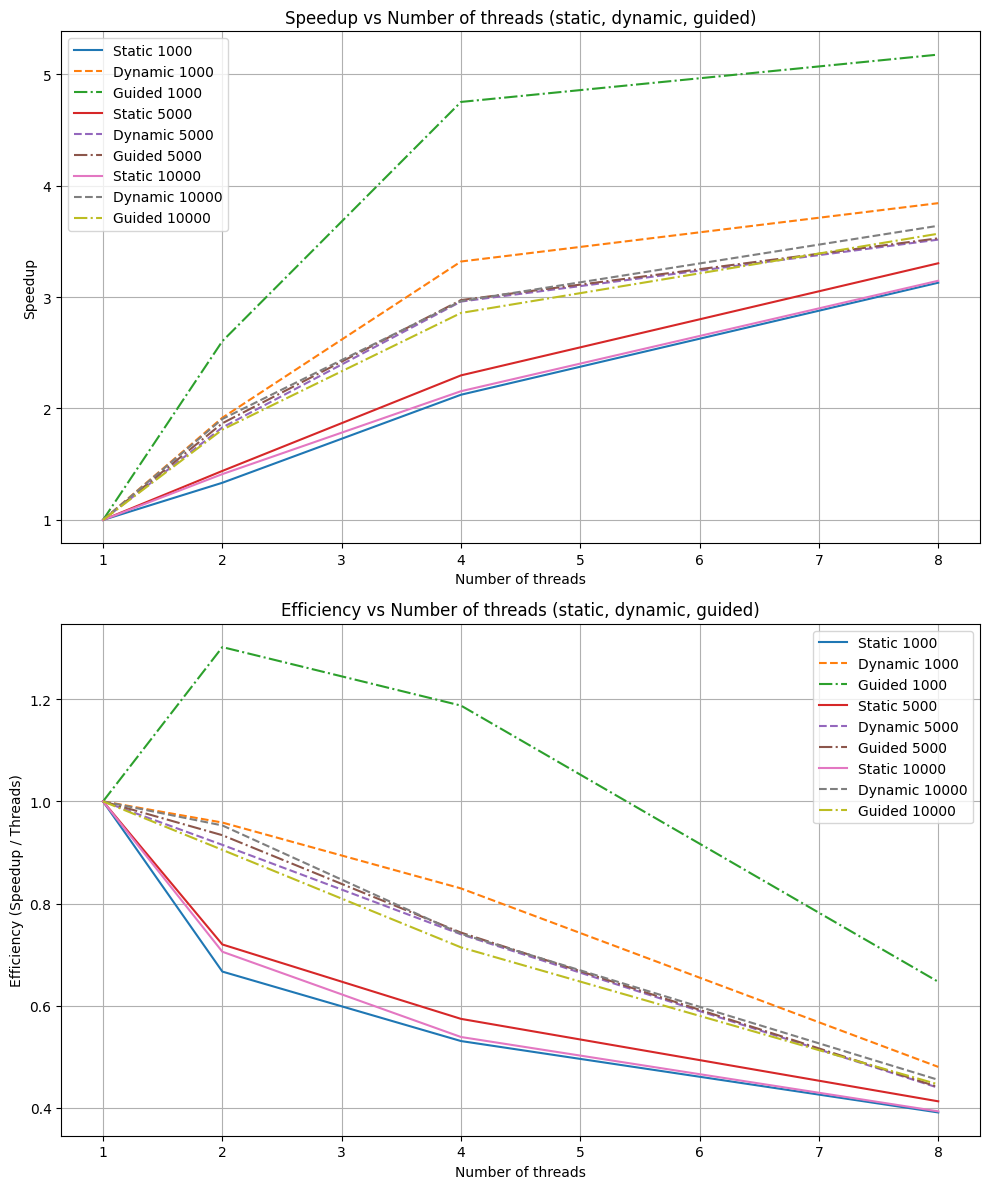

In [49]:
# Преобразуем num_threads в числовой формат
num_threads = ['1', '2', '4', '8']
num_threads = list(map(int, num_threads))

# Рассчитываем ускорение (Speedup) и эффективность (Efficiency) для static, dynamic, guided
speedup_static = []
speedup_dynamic = []
speedup_guided = []
efficiency_static = []
efficiency_dynamic = []
efficiency_guided = []

for i in range(len(data_sizes)):
    base_static = time_static[i][0]
    base_dynamic = time_dynamic[i][0]
    base_guided = time_guided[i][0]
    
    # Рассчитываем ускорение для каждого подхода
    speedup_static.append([base_static / t for t in time_static[i]])
    speedup_dynamic.append([base_dynamic / t for t in time_dynamic[i]])
    speedup_guided.append([base_guided / t for t in time_guided[i]])
    
    # Рассчитываем эффективность для каждого подхода
    efficiency_static.append([s / nt for s, nt in zip(speedup_static[i], num_threads)])
    efficiency_dynamic.append([s / nt for s, nt in zip(speedup_dynamic[i], num_threads)])
    efficiency_guided.append([s / nt for s, nt in zip(speedup_guided[i], num_threads)])

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup_static[i], label=f'Static {size}')
    ax[0].plot(num_threads, speedup_dynamic[i], label=f'Dynamic {size}', linestyle='--')
    ax[0].plot(num_threads, speedup_guided[i], label=f'Guided {size}', linestyle='-.')

ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads (static, dynamic, guided)')
ax[0].legend()
ax[0].grid(True)

# График эффективности
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency_static[i], label=f'Static {size}')
    ax[1].plot(num_threads, efficiency_dynamic[i], label=f'Dynamic {size}', linestyle='--')
    ax[1].plot(num_threads, efficiency_guided[i], label=f'Guided {size}', linestyle='-.')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads (static, dynamic, guided)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()



### Результаты:
- **Static:** Работает лучше для равномерных нагрузок, но для неравномерных может дать низкую эффективность из-за дисбаланса между потоками.
- **Dynamic:** Лучше распределяет неравномерные нагрузки, так как потоки получают новые итерации по мере освобождения.
- **Guided:** Компромисс между `static` и `dynamic`. Лучше для случаев с уменьшающейся сложностью итераций.


# 7 Задача (сравнение atomic, critical, mutex с редукцией) (среднее время по 10 попыткам)

# Атомарная операция выполняется полностью или не выполняется вовсе, исключая возможность вмешательства других потоков.
# Critical — это директива OpenMP, которая позволяет обозначить участок кода, выполняемый только одним потоком в любой момент времени. Она используется для защиты более сложных операций.
# Mutex используется для блокировки доступа к ресурсу. Блокировка и разблокировка выполняются вручную.

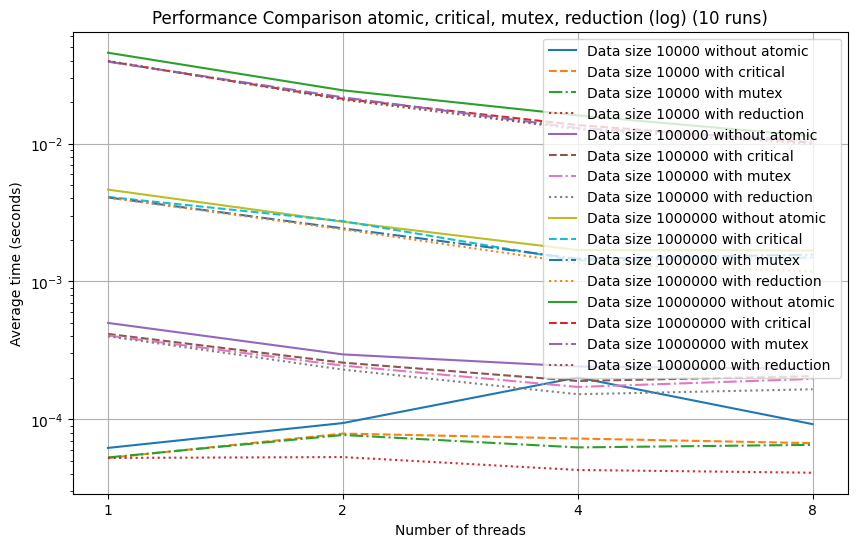

In [50]:
# Данные
data_sizes = ['10000', '100000', '1000000', '10000000']
num_threads = ['1', '2', '4', '8']

time_atomic = [
    [6.192e-05, 9.379e-05, 0.000201, 9.213e-05],
    [0.00050002, 0.00029549, 0.00024134, 0.00023242],
    [0.0046387, 0.00271132, 0.00168979, 0.00167911],
    [0.0457226, 0.0243909, 0.0160493, 0.0113342]  
]

time_critical = [
    [5.234e-05, 7.866e-05, 7.241e-05, 6.704e-05],
    [0.00041583, 0.00025744, 0.00018947, 0.00020557],
    [0.00410434, 0.00273922, 0.00141596, 0.00149104],
    [0.0395816, 0.0211843, 0.0136462, 0.0101599]  
]

time_mutex = [
    [5.277e-05, 7.686e-05, 6.244e-05, 6.517e-05],
    [0.00040454, 0.00024491, 0.00017148, 0.0001962],
    [0.0040711, 0.0024287, 0.00145964, 0.00156701],
    [0.0393499, 0.0216967, 0.0129887, 0.0105816]  
]

time_reduction = [
    [5.236e-05, 5.313e-05, 4.283e-05, 4.09e-05],
    [0.00039973, 0.00022913, 0.00015184, 0.00016501],
    [0.00405497, 0.00238781, 0.00135199, 0.00118084],
    [0.0399222, 0.0208607, 0.0127431, 0.00994557]  
]



fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time_atomic[i], label=f'Data size {size} without atomic')
    ax.plot(num_threads, time_critical[i], label=f'Data size {size} with critical', linestyle='--')
    ax.plot(num_threads, time_mutex[i], label=f'Data size {size} with mutex', linestyle='-.')
    ax.plot(num_threads, time_reduction[i], label=f'Data size {size} with reduction', linestyle=':')
    
ax.set_yscale('log')  # Логарифмическая шкала для оси Y (по времени)
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison atomic, critical, mutex, reduction (log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


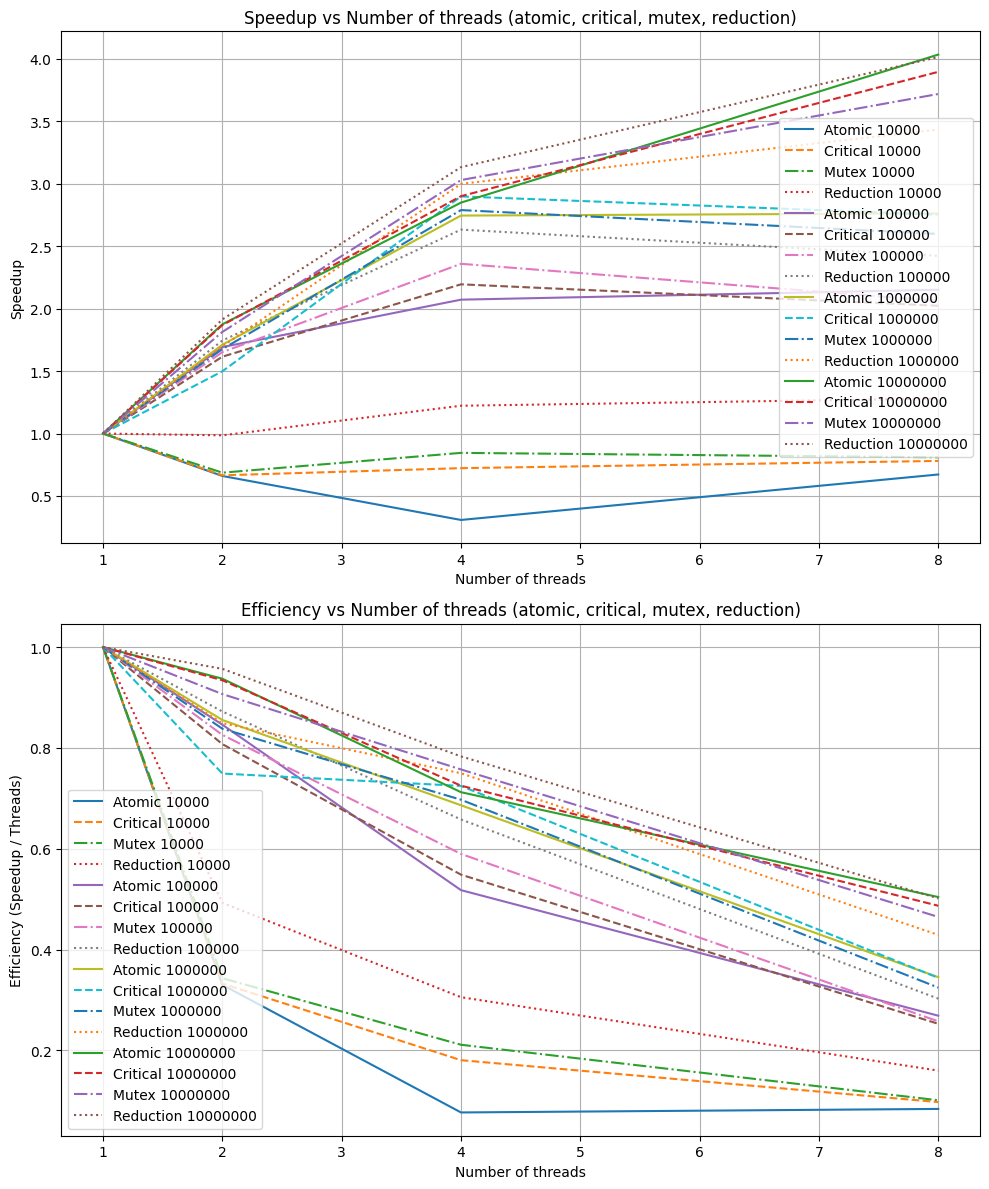

In [51]:
# Преобразуем num_threads в числовой формат
num_threads = ['1', '2', '4', '8']
num_threads = list(map(int, num_threads))

# Рассчитываем ускорение (Speedup) и эффективность (Efficiency) для atomic, critical, mutex, reduction
speedup_atomic = []
speedup_critical = []
speedup_mutex = []
speedup_reduction = []
efficiency_atomic = []
efficiency_critical = []
efficiency_mutex = []
efficiency_reduction = []

for i in range(len(data_sizes)):
    base_atomic = time_atomic[i][0]
    base_critical = time_critical[i][0]
    base_mutex = time_mutex[i][0]
    base_reduction = time_reduction[i][0]
    
    # Рассчитываем ускорение для каждого подхода
    speedup_atomic.append([base_atomic / t for t in time_atomic[i]])
    speedup_critical.append([base_critical / t for t in time_critical[i]])
    speedup_mutex.append([base_mutex / t for t in time_mutex[i]])
    speedup_reduction.append([base_reduction / t for t in time_reduction[i]])
    
    # Рассчитываем эффективность для каждого подхода
    efficiency_atomic.append([s / nt for s, nt in zip(speedup_atomic[i], num_threads)])
    efficiency_critical.append([s / nt for s, nt in zip(speedup_critical[i], num_threads)])
    efficiency_mutex.append([s / nt for s, nt in zip(speedup_mutex[i], num_threads)])
    efficiency_reduction.append([s / nt for s, nt in zip(speedup_reduction[i], num_threads)])

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup_atomic[i], label=f'Atomic {size}')
    ax[0].plot(num_threads, speedup_critical[i], label=f'Critical {size}', linestyle='--')
    ax[0].plot(num_threads, speedup_mutex[i], label=f'Mutex {size}', linestyle='-.')
    ax[0].plot(num_threads, speedup_reduction[i], label=f'Reduction {size}', linestyle=':')

ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads (atomic, critical, mutex, reduction)')
ax[0].legend()
ax[0].grid(True)

# График эффективности
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency_atomic[i], label=f'Atomic {size}')
    ax[1].plot(num_threads, efficiency_critical[i], label=f'Critical {size}', linestyle='--')
    ax[1].plot(num_threads, efficiency_mutex[i], label=f'Mutex {size}', linestyle='-.')
    ax[1].plot(num_threads, efficiency_reduction[i], label=f'Reduction {size}', linestyle=':')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads (atomic, critical, mutex, reduction)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


# 8 Задача (вычисления скалярного произведения для последовательного набора векторов) (среднее по 1000 попыткам и 100 - размер вектора)

# Average execution time (parallel sections): 2.00009e-05 seconds
# Average execution time (force computation): 9.99928e-06 seconds


# 9 Задача (вычисления 4 задания с добавкой вложенного параллелизма) (среднее по 10 попыткам)

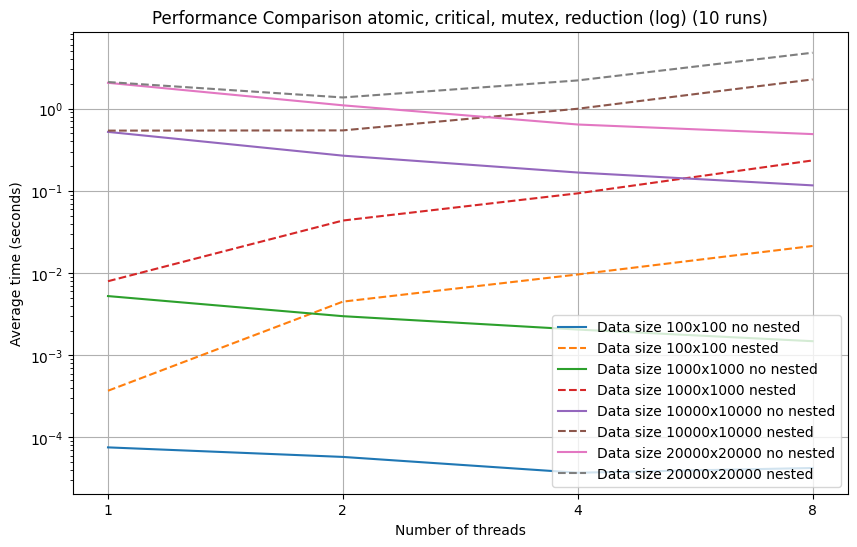

In [52]:
# Данные
data_sizes = ['100x100', '1000x1000', '10000x10000', '20000x20000']
num_threads = ['1', '2', '4', '8']

time_no_nested = [
    [7.579e-05, 5.801e-05, 3.726e-05, 4.255e-05],
    [0.00525232, 0.00299074, 0.00205644, 0.00148449],
    [0.522381, 0.268507, 0.167384, 0.116768],
    [2.06577, 1.09965, 0.642513, 0.491038]
]

time_nested = [
    [0.00037048, 0.00449627, 0.00962585, 0.0213867],
    [0.00796684, 0.0436028, 0.0934043, 0.234853],
    [0.541334, 0.54481, 0.999325, 2.27115],
    [2.11101, 1.37054, 2.20908, 4.80002]
]

speedup = [
    [0.204572, 0.0129018, 0.00387083, 0.00198955],
    [0.659273, 0.0685905, 0.0220166, 0.00632093],
    [0.964988, 0.492845, 0.167497, 0.0514137],
    [0.97857, 0.802345, 0.290851, 0.102299]
]


fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time_no_nested[i], label=f'Data size {size} no nested')
    ax.plot(num_threads, time_nested[i], label=f'Data size {size} nested', linestyle='--')
    
ax.set_yscale('log')  # Логарифмическая шкала для оси Y (по времени)
ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison atomic, critical, mutex, reduction (log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


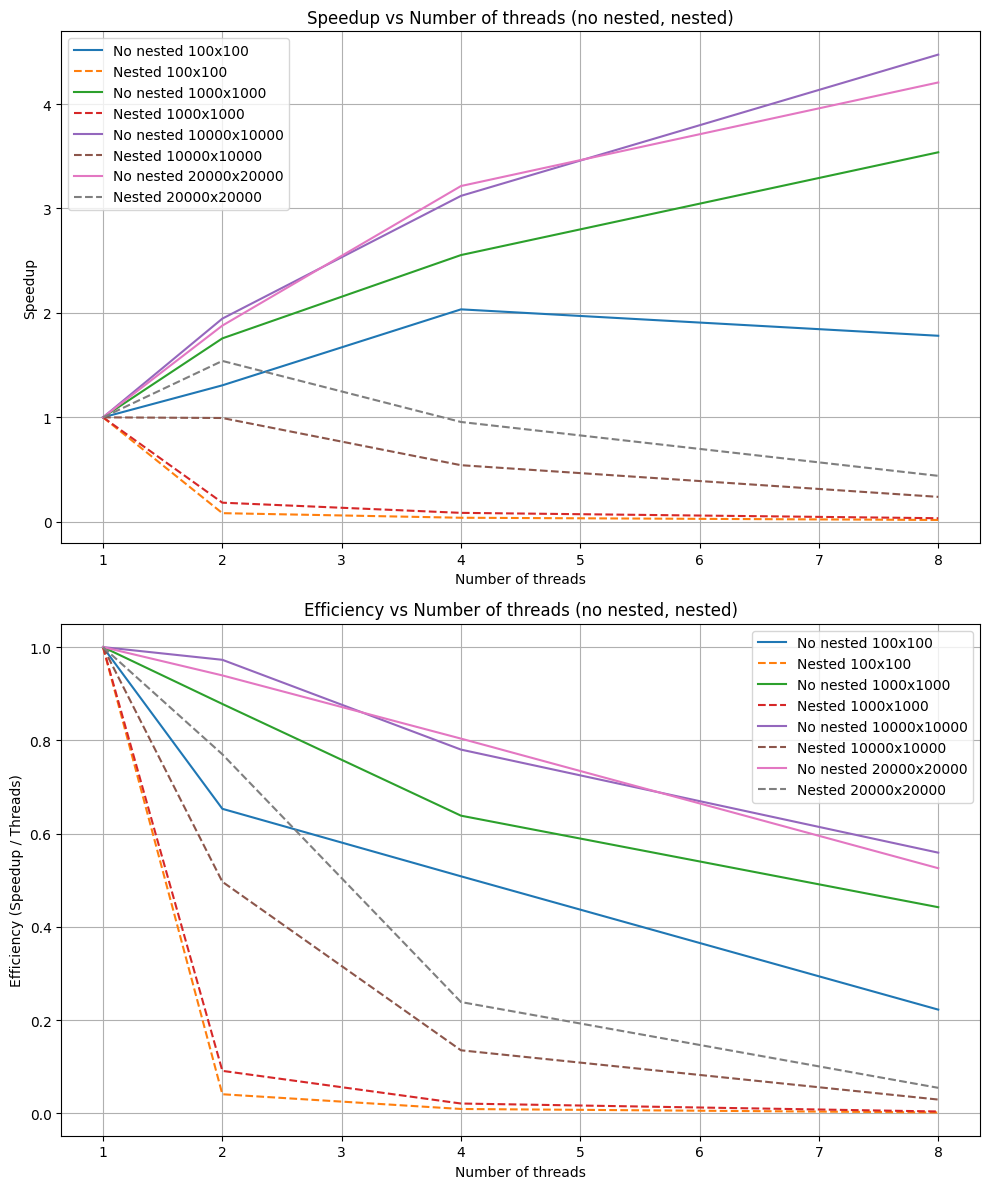

In [53]:
# Преобразуем num_threads в числовой формат
num_threads = ['1', '2', '4', '8']
num_threads = list(map(int, num_threads))

# Рассчитываем ускорение (Speedup) и эффективность (Efficiency) для nested и no_nested
speedup_nested = []
speedup_no_nested = []
efficiency_nested = []
efficiency_no_nested = []

for i in range(len(data_sizes)):
    base_no_nested = time_no_nested[i][0]
    base_nested = time_nested[i][0]
    
    # Рассчитываем ускорение для каждого подхода
    speedup_no_nested.append([base_no_nested / t for t in time_no_nested[i]])
    speedup_nested.append([base_nested / t for t in time_nested[i]])
    
    # Рассчитываем эффективность для каждого подхода
    efficiency_no_nested.append([s / nt for s, nt in zip(speedup_no_nested[i], num_threads)])
    efficiency_nested.append([s / nt for s, nt in zip(speedup_nested[i], num_threads)])

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup_no_nested[i], label=f'No nested {size}')
    ax[0].plot(num_threads, speedup_nested[i], label=f'Nested {size}', linestyle='--')

ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads (no nested, nested)')
ax[0].legend()
ax[0].grid(True)

# График эффективности
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency_no_nested[i], label=f'No nested {size}')
    ax[1].plot(num_threads, efficiency_nested[i], label=f'Nested {size}', linestyle='--')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads (no nested, nested)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
